# Managing your GIS servers
At version `1.2` the ArcGIS API for Python introduces a new `server` submodule under the `gis.admin` module that allows administrators to manage the ArcGIS servers powering their ArcGIS Enterprises. ArcGIS Enterprise includes several software components that are designed to work together. A basic ArcGIS Enterprise deployment can consist of the following:

 - [ArcGIS Server](http://server.arcgis.com/en/server/)
 - [Portal for ArcGIS](http://server.arcgis.com/en/portal/)
 - [ArcGIS Data Store](http://server.arcgis.com/en/portal/latest/administer/windows/what-is-arcgis-data-store.htm)
 - [ArcGIS Web Adaptor](http://server.arcgis.com/en/web-adaptor/latest/install/iis/about-arcgis-web-adaptor-portal-.htm)

Refer to [ArcGIS Enterprise deployment patterns](http://server.arcgis.com/en/server/latest/get-started/windows/base-arcgis-enterprise-deployment.htm) to learn more about different deployment patterns for ArcGIS Enterprise. No matter which pattern your deployment is, the `server` module can be used to access and manage it. The diagram below represents the main classes and methods available in the `server` module

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_gis_admin_server_module_01.png" height=800px width=800px> </img> 

**Table of Contents**

This non-exhaustive guide covers the following topics

 - [Accessing the servers behind your GIS](#Accessing-the-servers-behind-your-GIS)
 - [Managing the services on your server](#Managing-the-services-on-your-server)
  - [Getting the list of services](#Getting-the-list-of-services)
  - [Managing service folders](#Managing-service-folders)
  - [Checking if a service exists](#Checking-if-a-service-exists)
  - [Administering services](#Administering-services)
  - [Publishing new services](#Publishing-new-services)
  - [Renaming a service](#Renaming-a-service)
  - [Deleting a service](#Deleting-a-service)
 - [Managing server data stores](#Managing-server-data-stores)
  - [Listing the data stores registered with the server](#Listing-the-data-stores-registered-with-the-server)
  - [Registering new data stores with the server](#Registering-new-data-stores-with-the-server)
  - [Validating data stores](#Validating-data-stores)
  - [Removing data store entries](#Removing-data-store-entries)
 - [Querying server logs](#Querying-server-logs)
 - [Monitoring server usage](#Monitoring-server-usage)
  - [Using built-in reports](#Using-built-in-reports)
  - [Querying max reponse times for the last 7 days](#Querying-maximum-reponse-times-for-the-last-7-days)
  - [Creating quick reports](#Creating-Quick-Reports)
 - [Accessing the machines powering your servers](#Accessing-the-machines-powering-your-servers)
 - [Monitoring your server licenses and system settings](#Monitoring-your-server-licenses-and-system-settings)
  - [Accessing system directories](#Accessing-system-directories)
  - [Monitoring server licenses and extensions](#Monitoring-server-licenses-and-extensions)

To start with, import the Python API and connect to your GIS as an administrator.

<blockquote><b>Note:</b> To make use of the server module, you need to connect it using an account with administrative privileges. The server module is only applicable if your GIS is an instance of ArcGIS Enterprise and would not work for ArcGIS Online.</blockquote>

In [1]:
from arcgis.gis import GIS
gis = GIS("http://siteurl.mysite.com/portal", "username")

Enter password: ········


## Accessing the servers behind your GIS
You can get the list of all servers hosted or federated to your Enterprise by calling the `list()` method from `admin.servers` object.

In [2]:
gis_servers = gis.admin.servers.list()
gis_servers

[<Server at https://python.playground.esri.com/server/admin>,
 <Server at https://python-ga.playground.esri.com/server/admin>,
 <Server at https://python-ra.playground.esri.com/arcgis/admin>]

In [3]:
server1 = gis_servers[0]
type(server1)

arcgis.gis.server.admin.administration.Server

Once you access your `Server` object, you can perform operations such as managing data stores, querying logs, accessing services, publishing new services etc. as explained in the rest of this guide 

#### Validate your servers
You can quickly check if your servers are responding to your Enterprise by calling the `validate()` method. If you get back `False`, you may need to check one or more of your servers.

In [12]:
gis.admin.servers.validate()

True

## Managing the services on your server
### Getting the list of services
One of the important tasks you can perform on a server is monitoring the services running on it and publishing new ones. You can list the services by calling `list()` method from the `Server.services` object. By default, you get the services running in `root` folder.

In [4]:
server1.services.list()

[<Service at https://python.playground.esri.com/server/admin/services/ALS_Clinics.MapServer>,
 <Service at https://python.playground.esri.com/server/admin/services/ALS_Patients.MapServer>,
 <Service at https://python.playground.esri.com/server/admin/services/elevation_270m.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/forest_service.MapServer>,
 <Service at https://python.playground.esri.com/server/admin/services/human_modification_index.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/human_modification_na.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/ImgSrv_Landast_Montana2015.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/National_Elevation_Dataset_270m.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/SampleWorldCities.MapServer>]

To get the services running in a different folder, specify its name as an argument. To get the list of folders on your server, call the `folders` property

In [5]:
server1.services.folders

['Hosted', 'System', 'Utilities', '/']

List the services running in `System` folder

In [14]:
hosted_services = server1.services.list(folder='System')

#print the top 5 as a sample
hosted_services[0:4]

[<Service at https://python.playground.esri.com/server/admin/services/System/CachingControllers.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/CachingTools.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/CachingToolsEx.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/DistributedWorker.GPServer>]

### Checking if a service exists
To check if a service exists on your server, call the `exists()` method and specify the folder name, service name and type. You can also use this method to verify if a folder exists on the server.

In [ ]:
# check if a FeatureService called 'Ports' exists in Hosted folder
server1.services.exists(folder_name='Hosted', name='Ports', service_type='FeatureServer')

### Managing service folders
You can add or remove folders on your server by calling `create_folder()`, `delete_folder()`. 

<blockquote><b>Note:</b> These folders are different from folders found on user's 'my contents'. To access those folders see <a href="http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html#arcgis.gis.ContentManager.create_folder">ConentManager.create_folder</a> and <a href="http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html#arcgis.gis.User.folders"> User.folders</a></blockquote>

In [22]:
server1.services.create_folder('crime_analysis')

True

You can delete this folder by calling `delete_folder()`

In [23]:
server1.services.delete_folder('crime_analysis')

True

### Administering services
If you noticed earlier, calling `services.list()` returns you a list of `Service` objects. Using a `Service` object, you can start, stop, delete, edit, rename and query the properties of a service.

In [26]:
# access the 'SampleWorldCities' service running on root folder
service1 = server1.services.list()[-1]
type(service1)

arcgis.gis.server.Service

Query the `properties` property to get details on the service

In [25]:
service1.properties

{
  "serviceName": "SampleWorldCities",
  "type": "MapServer",
  "description": "The SampleWorldCities service is provided so you can quickly and easily preview the functionality of the GIS server. Click the thumbnail image to open in a web application. This sample service is optional and can be deleted.",
  "capabilities": "Map,Query,Data",
  "provider": "ArcObjects",
  "clusterName": "default",
  "minInstancesPerNode": 1,
  "maxInstancesPerNode": 1,
  "instancesPerContainer": 1,
  "maxWaitTime": 60,
  "maxStartupTime": 300,
  "maxIdleTime": 180,
  "maxUsageTime": 600,
  "loadBalancing": "ROUND_ROBIN",
  "isolationLevel": "HIGH",
  "configuredState": "STARTED",
  "recycleInterval": 24,
  "recycleStartTime": "00:00",
  "keepAliveInterval": -1,
  "private": false,
  "isDefault": false,
  "maxUploadFileSize": 0,
  "allowedUploadFileTypes": "",
  "properties": {
    "useLocalCacheDir": "true",
    "outputDir": "/gisdata/arcgisserver/directories/arcgisoutput",
    "cacheDir": "/gisdata/arc

You can also query fine-grained information such as the `capabilities` enabled on the service

In [27]:
service1.properties.capabilities

'Map,Query,Data'

You can get the `id` of one or more `Item`s corresponding to this service on the Enterprise as shown below:

In [29]:
service1.properties.portalProperties.portalItems

[{
   "type": "MapServer",
   "itemID": "0102400090a144259679b6cde45b82b1"
 }, {
   "type": "WMSServer",
   "itemID": "63250a9efb94447c80c9ca0ad578a4c5"
 }]

#### Getting status on a service
Calling the `status` property returns a dictionary with the real time state of the service.

In [30]:
service1.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

#### Starting and stopping a service
Call the `start()` and `stop()` methods to start and stop a service.

In [31]:
service1.stop()

True

In [32]:
#call the status to confirm
service1.status

{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}

In [33]:
#start the service and confirm
service1.start()
service1.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

### Publishing new services
You can publish new services to your server by calling `publish_sd()` method from `Server.services` object.

<blockquote><b>Note:</b> You need a <i>service definition</i> file to publish a service. You can create SD files using ArcGIS Desktop and Pro. To automate the creation of SD files from your map or project files, refer to <a href="http://desktop.arcgis.com/en/arcmap/latest/tools/server-toolbox/stage-service.htm">ArcPy documentation</a></blockquote>

In [35]:
server1.services.publish_sd(sd_file_path='/Users/atma6951/Documents/GIS_data/SanDiego_maps.sd',
                            folder=None)

{'name': 'System/CachingControllers', 'type': 'GPServer'}
{'name': 'System/CachingToolsEx', 'type': 'GPServer'}
{'name': 'System/CachingTools', 'type': 'GPServer'}
{'name': 'System/DynamicMappingHost', 'type': 'MapServer'}
{'name': 'System/PublishingToolsEx', 'type': 'GPServer'}
{'name': 'System/PublishingTools', 'type': 'GPServer'}


WARNING 086222: Output directory in service definition is not set or is invalid. Using default output directory.
WARNING 086224: Cache directory in service definition is not set or is invalid. Using default cache directory.


True

Publishing a service to the server will create an item on the Enterprise. In this case, the service was called 'AGSMS_SD', hence the name of the item.

<Item title:"AGSMS_SD" type:Map Image Layer owner:atma.mani>
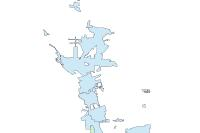

In [42]:
new_item = gis2.content.search('owner:atma.mani', item_type = 'Map Service')[0]
new_item

In [43]:
new_item.url

'https://python.playground.esri.com/server/rest/services/AGSMS_SD/MapServer'

### Renaming a service
As ArcGIS administrators, you must be familiar that the name of the service forms its URL. You can rename a service, however, this operation should be used carefully since it would break all the layers and maps that refer to this service by its URL

In [45]:
# search for the service
new_service = server1.services.list()[0]
type(new_service)

arcgis.gis.server.Service

Give this service a descriptive name. Service names cannot contain spaces or special characters.

In [46]:
new_service.rename('SanDiego_boundary')

True

Renaming will create a new item on the Enterprise corresponding to the new URL

In [58]:
gis2.content.search('owner:atma.mani', 'Map Service')

[<Item title:"AGSMS_SD" type:Map Image Layer owner:atma.mani>,
 <Item title:"SanDiego_boundary" type:Map Image Layer owner:atma.mani>]

The first `Item` is now stale and should be deleted by you. The second `Item` corresponds to the renamed service. You can access and print its `url` property to verify:

In [59]:
renamed_item = gis2.content.search('owner:atma.mani', 'Map Service')[1]
renamed_item.url

'https://python.playground.esri.com/server/rest/services/SanDiego_boundary/MapServer'

Thus, you can rename services, or change their URLs using the Python API. You cannot however, use `rename()` to move a service from one folder into another folder on the server after it is published.

### Deleting a service
To delete a service, simply call the `delete()` method on the `Service` object.

In [68]:
#Delete the San Diego service. Since it was renamed, you need to search for it
service_list = server1.services.list()
service_list

[<Service at https://python.playground.esri.com/server/admin/services/elevation_270m.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/forest_service.MapServer>,
 <Service at https://python.playground.esri.com/server/admin/services/human_modification_index.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/ImgSrv_Landast_Montana2015.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/SampleWorldCities.MapServer>,
 <Service at https://python.playground.esri.com/server/admin/services/SanDiego_boundary.MapServer>]

In [69]:
service_list[-1].delete()

True

## Managing server data stores
ArcGIS Data Store is an application that lets you easily configure data storage for hosting and federated servers used with your Enterprise. ArcGIS Data Store provides you with a convenient setup and configuration experience that creates the following different types of data stores.

 - Relational data store -- Stores your portal's hosted feature layer data, including hosted feature layers created as output from spatial analysis tools run in the portal
 - Tile cache data store -- Stores caches for your portal's hosted scene layers
 - Spatiotemporal big data store -— Archives real-time observational data that you can use with an ArcGIS Server running ArcGIS GeoEvent Server that is federated with your portal; also stores the results generated using ArcGIS GeoAnalytics Server tools.

Using the `Server.datastores` object, you can list, add, remove datastore items as shown below:

### Listing the data stores registered with the server
Calling the `datastores.list()` method returns you a list of `Datastore` objects.

In [8]:
dstores = server1.datastores.list()
len(dstores)

3

In [10]:
dstore1 = dstores[0]
type(dstore1)

arcgis.gis.server.Datastore

Print the path for each of these `Datastore` objects.

In [13]:
for dstore in dstores:
    print(dstore.properties.path)

/enterpriseDatabases/AGSDataStore_ds_7jq2u67r
/nosqlDatabases/AGSDataStore_bigdata_bds_xjyajz5y
/nosqlDatabases/AGSDataStore_nosqldb_tcs_a6tghhpc


### Registering new data stores with the server

You can add or register new data stores with your server by calling the corresponding add method such as `add_folder()`, `add_database()`, `add_big_data()`. To know what types of data stores are supported by your server, query the `data_items` property:

In [33]:
server1.datastores.data_items

{'rootItems': ['/bigDataFileShares',
  '/cloudStores',
  '/enterpriseDatabases',
  '/fileShares',
  '/nosqlDatabases',
  '/rasterStores']}

Add a folder data store

In [25]:
ca_datastore = server1.datastores.add_folder(name='CA_earthquakes', 
                              server_path='\\teton\atma_shared\datasets\californiapoints')
ca_datastore

<Datastore title:"https://Dev005223.esri.com:6443/arcgis/admin/data/items/fileShares/CA_earthquakes" type:"folder">

In [34]:
type(ca_datastore)

arcgis._impl._server.admin._data.Datastore

The `add_folder()` method returns you a `Datastore` object. This object can be used to inspect, modify or delete / unregister that data store entry. You can inspect the properties of the data store by querying the `properties` property.

In [36]:
ca_datastore.properties

{
  "path": "/fileShares/CA_earthquakes",
  "type": "folder",
  "id": "53c50994-9b2b-4cf2-bcfd-a59651cea8ed",
  "info": {
    "path": "\\teton\u0007tma_shared\\datasets\\californiapoints",
    "dataStoreConnectionType": "shared"
  }
}

### Validating data stores
You can validate the data store registered with your server to ensure your server can continue to access them.

In [35]:
ca_datastore.validate()

True

You can validate all the data stores by calling the `validate()` method from the `Server.datastores` object

In [41]:
server1.datastores.validate()

True

### Removing data store entries

To remove a data store, simply call the `delete()` method from the corresponding `Datastore` object:

In [42]:
ca_datastore.delete()

True

## Querying server logs
ArcGIS Server records events that occur, and any errors associated with those events, to logs. Logs are an important tool for monitoring and troubleshooting problems with your site. Information in the logs will help you identify errors and provide context on how to address problems. Refer [about server logs](http://server.arcgis.com/en/server/latest/administer/windows/about-server-logs.htm) to learn more about your ArcGIS Server logs, setting different logging levels etc.

You can access a server's logs using the `logs` property of the `Server` object.

In [43]:
server1.logs.settings

{'logDir': 'C:\\arcgisserver/logs\\',
 'logLevel': 'WARNING',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'statisticsConfig': {'enabled': True,
  'maxHistory': 0,
  'samplingInterval': 30,
  'statisticsDir': 'C:\\arcgisserver\\directories\\arcgissystem'},
 'usageMeteringEnabled': False}

### Filtering and querying server logs
Using the `query()` method, you can filter and search for server logs. Refer to the [query API ref doc](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.server.html#arcgis.gis.server.LogManager.query) for all the arguments supported. In the example below, logs for the previous 10 days is searched.

In [47]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=10)
start_time

datetime.datetime(2017, 7, 30, 15, 29, 4, 144692)

You can pass a Python `Datetime` object to the time arguments.

In [50]:
recent_logs = server1.logs.query(start_time = start_time)

#print a message as a sample
recent_logs['logMessages'][0]

{'code': 6602,
 'elapsed': '',
 'machine': 'DEV005223.ESRI.COM',
 'message': "Failed to return the service configuration 'Utilities/PrintingTools.GPServer'. Server machine 'https://DEV005223.ESRI.COM:7443/arcgis/sharing/rest/content/items/430b49a241bd418aaf476d7e5a64fdb9' returned an error. 'Item does not exist or is inaccessible.'",
 'methodName': '',
 'process': '5660',
 'source': 'Admin',
 'thread': '14',
 'time': 1499634940286,
 'type': 'SEVERE',
 'user': ''}

You can construct a Pandas `DataFrame` from the query result and visualize the logs as a table:

In [51]:
log_df = pd.DataFrame.from_records(recent_logs)
log_df.head(5) #display the first 5 records

,endTime,hasMore,logMessages,startTime
0,1497908616688,False,"{'type': 'SEVERE', 'message': 'Failed to retur...",1499634940286
1,1497908616688,False,"{'type': 'SEVERE', 'message': 'Unable to conne...",1499634940286
2,1497908616688,False,"{'type': 'SEVERE', 'message': 'Unable to conne...",1499634940286
3,1497908616688,False,"{'type': 'SEVERE', 'message': 'Unable to conne...",1499634940286
4,1497908616688,False,"{'type': 'SEVERE', 'message': 'Unable to conne...",1499634940286


You can quickly check for errors reports as shown below:

In [57]:
server1.logs.count_error_reports()

{'machineName': 'DEV005223.ESRI.COM', 'reportCount': 0}

## Monitoring server usage
ArcGIS Server records various service statistics, such as total requests, average response time and timeouts. Administrators and publishers can use this information to monitor service activity to better understand how clients are using services. For example, monitoring server statistics help you answer questions such as:

 - What is the total number of requests that my ArcGIS Server site handled during the past week?
 - How was the service request load distributed during the past month?
 - How are my services performing on an hourly basis?
 - What was the maximum number of service instances used at any given time for a particular service?

To learn more about this, refer to [about server statistics](http://server.arcgis.com/en/server/latest/administer/windows/about-server-statistics.htm) help page. To access this information, use the `Server.usage` property:

In [71]:
server1.usage.settings

{'enabled': True,
 'maxHistory': 0,
 'samplingInterval': 30,
 'statisticsDir': 'C:\\arcgisserver\\directories\\arcgissystem'}

### Using built-in reports
By default, when you install ArcGIS Server, you get three pre-configured reports. These reports are based on services that are already running on your server. You can access these and any new reports you create by querying the `list()` method.

In [88]:
usage_reports = server1.usage.list()
usage_reports

You get back a list of `Report` objects. Print the names of the reports:

In [73]:
for r in usage_reports:
    print(r.properties['reportname'])

Max response times for the last 7 days
Timed-out requests for the last 7 days
Total requests for the last 7 days


### Querying maximum reponse times for the last 7 days

In [89]:
max_resp_report = usage_reports[0]

#Run the query
data = max_resp_report.query()

#display the keys in the report query response
data['report'].keys()

dict_keys(['reportname', 'metadata', 'time-slices', 'report-data'])

Plot the response time in a bar chart

In [76]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

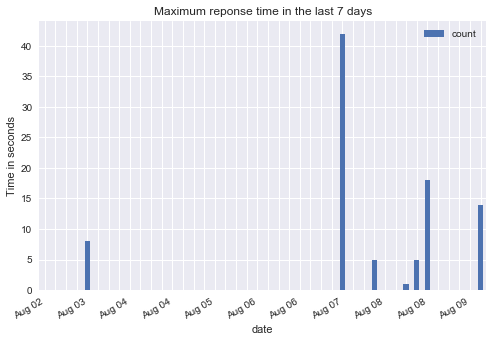

In [108]:
#store reponse times in Y axis
data_y = data['report']['report-data'][0][0]['data']

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]

df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df['count'].plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_title('Maximum reponse time in the last 7 days')
ax.set_ylabel('Time in seconds')
plt.gcf().autofmt_xdate()
plt.show()

### Creating Quick Reports

Quick reports are useful for administrators who want to get a one-shot set of data.  This information is generated on the fly on ArcGIS Server, and allows for report generation for services or server information that may not be monitored all the time.  


<blockquote><b>Note: </b> On the fly reports that are deleted right after data is returned</blockquote>

The quick report supports various time spans:

- LAST_DAY - 24 hours from your current time
- LAST_WEEK - 7 days from your current date
- LAST_MONTH - 31 days from your current date
- LAST_YEAR - 365 days from your current date

Reporting Queries are made by specifying the resource you want to monitor.  For example, administrators who want to monitor a specific folder, **HOSTED**, would set the query to: `services/Hosted`.  The default is to monitor all services.

Quick report metrics are:

- RequestCount - the number of requests received
- RequestsFailed - the number of requests that failed
- RequestsTimedOut - the number of requests that timed out
- RequestMaxResponseTime - the maximum response time
- RequestAvgResponseTime - the average response time
- ServiceActiveInstances - the maximum number of active (running) service instances sampled at 1 minute intervals, for a specified service

Get the total number of requests in the last 1 year

In [120]:
data = server1.usage.quick_report(since="LAST_MONTH", metrics="RequestCount")
data['report'].keys()

dict_keys(['reportname', 'metadata', 'time-slices', 'report-data'])

Plot the results in a bar chart

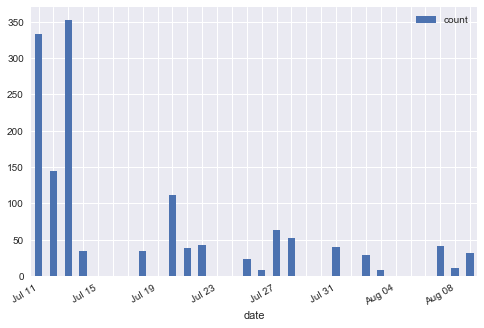

In [121]:
#store reponse times in Y axis
data_y = data['report']['report-data'][0][0]['data']

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]

#create a Pandas DataFrame from the report
df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

#plot as a bar chart
ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()

## Accessing the machines powering your servers
You can access the machines powering your GIS servers using the `Server.machines` property. By calling the `list()` method, you get back a list of `Machine` objects:

In [122]:
machine_list = server1.machines.list()
machine_list

[<Machine at https://python.playground.esri.com/server/admin/machines/10.0.0.250>]

Access the properties of a machine using `properties`.

In [125]:
m1 = machine_list[0]
m1.properties

{
  "machineName": "DEV005223.ESRI.COM",
  "platform": "Windows Server 2012 R2-amd64-6.3",
  "ports": {
    "OpenEJBPort": 4000,
    "JMXPort": 4001,
    "NamingPort": 4002,
    "DerbyPort": 4003,
    "tcpClusterPort": 4004,
    "HTTP": 6080,
    "webSocketsPort": 6180,
    "HTTPS": 6443
  },
  "ServerStartTime": 1498283009444,
  "webServerMaxHeapSize": -1,
  "appServerMaxHeapSize": 256,
  "socMaxHeapSize": 64,
  "webServerSSLEnabled": true,
  "webServerCertificateAlias": "SelfSignedCertificate",
  "adminURL": "https://Dev005223.esri.com:6443/arcgis/admin",
  "configuredState": "STARTED",
  "synchronize": false
}


Use the `status` property to verify the state of your machine.

In [126]:
m1.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

Get the list of SSL certificates:

In [127]:
m1.ssl_certificates

{'certificates': ['selfsignedcertificate']}

Download existing certificates or import new ones to your server using the appropriate methods:

In [129]:
m1.export_certificate(m1.ssl_certificates['certificates'][0])

'/var/folders/48/f8q226cx6wn8h5t8xkv5y7rhj1s2w8/T/SelfSignedCertificate.cer'

## Monitoring your server licenses and system settings
### Accessing system directories
Calling the `directories` property of `Server.system` returns you back a list of `Directory` objects.

In [12]:
all_dir = server1.system.directories().all()
all_dir[0]

<ServerDirectory at https://python.playground.esri.com/server/admin/system/directories/arcgisjobs>

Print the name and path on disk for each of these server directories:

In [13]:
for fld in all_dir:
    print(fld.properties.name + " : " + fld.properties.physicalPath)

arcgisjobs : /gisdata/arcgisserver/directories/arcgisjobs
arcgisjobregistry : /gisdata/arcgisserver/directories/arcgissystem/arcgisjobregistry
arcgisuploads : /gisdata/arcgisserver/directories/arcgissystem/arcgisuploads
arcgiscache : /gisdata/arcgisserver/directories/arcgiscache
arcgisinput : /gisdata/arcgisserver/directories/arcgissystem/arcgisinput
arcgisoutput : /gisdata/arcgisserver/directories/arcgisoutput
arcgisindex : /gisdata/arcgisserver/directories/arcgissystem/arcgisindex
kml : /gisdata/arcgisserver/directories/arcgissystem/kml
arcgissystem : /gisdata/arcgisserver/directories/arcgissystem


By calling the `clean()` and `edit()` methods on a `Directory` object, you can clean the contents or designate a different directory path for the server.

### Monitoring server licenses and extensions
Use the `licenses` property of `Server.system` object to get a dictionary of various licenses and extensions available on the server.

In [150]:
server1.system.licenses.keys()

dict_keys(['edition', 'level', 'datafeature', 'extensions', 'features'])

Find the license level of the current server:

In [173]:
server1.system.licenses['edition']

{'canExpire': True,
 'expiration': 1508223600000,
 'featureName': 'esriServerLicenseAdvanced',
 'name': 'svradvanced',
 'version': '10.5'}

Print all the extensions and their expiration:

In [189]:
from datetime import datetime

for extn in server1.system.licenses['features']:
    #convert expiration to a readable format
    d = datetime.fromtimestamp(int(extn['expiration']/1000))
    
    print("{:50s} {}".format(extn['displayName'], d.isoformat()))

ArcGIS Server Advanced Core                        2017-10-17T00:00:00
SDE Enterprise Core                                2017-10-17T00:00:00
ArcGIS Aviation: Airports for Server               2017-10-17T00:00:00
Workflow Manager Extension for ArcGIS Server       2017-10-17T00:00:00
ArcGIS Aviation: Charting for Server               2017-10-17T00:00:00
Business Analyst Extension for ArcGIS Server       2017-10-17T00:00:00
ArcGIS for INSPIRE                                 2017-10-17T00:00:00
ArcGIS Maritime: Charting for Server               2017-10-17T00:00:00
Location Referencing for Server                    2017-10-17T00:00:00
ArcGIS Data Reviewer Server                        2017-10-17T00:00:00
Esri Roads and Highways for ArcGIS Server          2017-10-17T00:00:00
ArcGIS Maritime: Bathymetry for Server             2017-10-17T00:00:00
Esri Defense Mapping for Server                    2017-10-17T00:00:00
ArcGIS Server Enterprise                           2017-10-17T00:00:00
Esri P